### CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
def load_data(path):
    return pd.read_csv(path)

In [5]:
heart_df = load_data('heartdisease.csv')


### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [6]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [7]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
# visualize if there are missing value 
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null bool
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.1 KB


In [9]:
# we can tell that none of the cols have missing value 
heart_df[heart_df.isnull()].sum()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
sick        0.0
dtype: float64

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?


[Discuss problem here]

The sick datafield needs to be converted from boolean to integer type (0 or 1) 

There are no missing values to impute. 

For numerical features, they must be normalized to the same scale to avoid one feature taking over the prediction

For categorical features, they need to be processed with One Hot encoding or Label Encoder, even though this dataset doesn't appear to have categorical data, some variable such as sex, cp and thal are encoded as numerical data should indeed be interpreted as categorical data. Thus we need to convert them into string, then use one hot encoding. 


### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [10]:
heart_df['sick'] = heart_df.sick.astype(int).to_frame()

In [11]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [30]:
heart_df[heart_df.isnull().any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick


In [31]:
heart_df.isnull().any(axis = 1)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

[Discuss problem here]

Exang, fbs, sex, sick are binary variables

Ca, cp, restecg, slope, thal all have a limited selection.

Oldpeak follows a downward gradient

The rest of the variables roughly have a normal distribution with differnt degree of skewness 

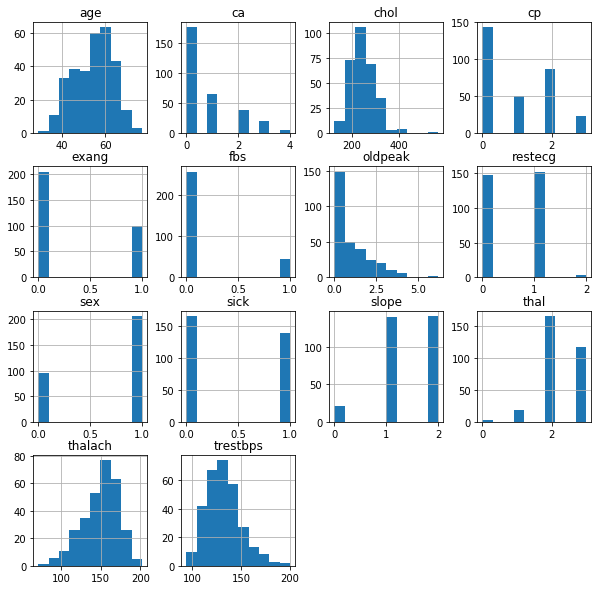

In [12]:
heart_df.hist(figsize=(10,10))
plt.show()

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

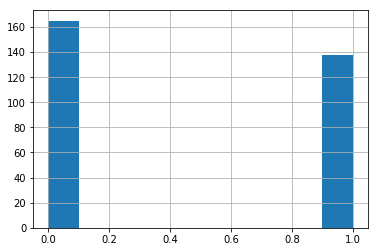

In [13]:
heart_df.sick.hist()
plt.show()

In [14]:
heart_df['sick'].value_counts()

0    165
1    138
Name: sick, dtype: int64

[Discuss problem here]

Although the numbers of sick and healthy indivisuals are not identical, we have a roughly balanced dataset

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss problem here]
1. We might not be able to collect further data points.

2. Even if we could collect more data, we might naively collect similar data points to those we already have in the dataset, which adds nothing valuable to the existing dataset.

3. By including more data points to the dataset in order to balance one feature, we might accidently introduce imbalance to other features.

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [15]:
corr = heart_df.corr()['sick'].to_frame(name='sick')
corr


,sick
age,0.225439
sex,0.280937
cp,-0.433798
trestbps,0.144931
chol,0.085239
fbs,0.028046
restecg,-0.137230
thalach,-0.421741
exang,0.436757
oldpeak,0.430696


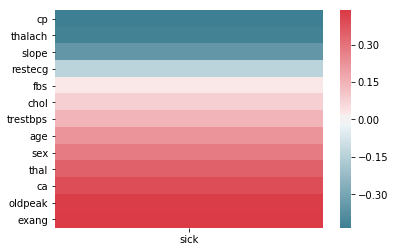

In [16]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# we don't need the correlation between sick and sick 
sns.heatmap(corr[:-1].sort_values(by='sick'), cmap=cmap)  

[Discuss correlations here] 

From the heatmap above, we can tell of all the variables:

thal, ca, oldpeak, exang, sex, age have positive correlation

slope, thalach, cp have negative correlation

Amoung all the variables, exang(positive) and cp(negative) are most correlated to sick

From reserach:

people age 65 and older are more likely to have heart attack 

Male has greater risk to suffer from heart attack 

Exercise reduced angina reduce blood flow to the heart which is a symptom of heart disease

Study has showed that depression can cause a heavy heart by clogging arteries, activate blood cell fragments causing clump in the bloodstream. 

The number of major vessels colored by fluoroscopy doesn't seem to have a scitific reason to have correlation with heart attack

Some reasearch has shown thalassemia can cause heart failutre and death.

Since cp is encoded as 0 indicates no chest pain, it makes sense to have negative correlation with the labels.

And normally ST segment slopes sharply upwards during exercise, thus going down might indicate abonormal condition.

The higher the heart rate is beyond normal range, the high change the patient is suffering from heart attack.

References:

https://www.nia.nih.gov/health/heart-health-and-aging

https://www.health.harvard.edu/heart-health/the-heart-attack-gender-gap

https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373

https://www.ahajournals.org/doi/full/10.1161/circheartfailure.109.913863

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1629217/


## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [17]:
labels = heart_df['sick']
heart_df.drop(columns='sick', inplace=True)

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(heart_df, 
                                                    labels, 
                                                    test_size = 0.3, 
                                                    random_state=42) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((212, 13), (212,), (91, 13), (91,))

### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# As discussed earlier, we need to normalize the data
exclude_cols= ["sex", "cp", "thal","fbs", 
               "restecg", "exang", "slope", 'sick']

num_pipeline = Pipeline([
                ('std_scaler', StandardScaler())
                ])
numerical_features = list(heart_df.loc[:,
                        ~heart_df.columns.isin(exclude_cols)])
categorical_features = ["sex", "cp", "thal","fbs", 
                        "restecg", "exang", "slope"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features), 
    ("cat", OneHotEncoder(), categorical_features),
])



# cast values to float to suppress the warning 
train_processed = full_pipeline.fit_transform(X_train[:].astype(float))

test_processed = full_pipeline.fit_transform(X_test[:].astype(float))
print(train_processed[0:5], train_processed[0:5])
print()
print(train_processed.shape, test_processed.shape)

[[-1.67339636 -2.14786993 -0.88680513  1.27119034 -0.93118976 -0.67629057
   1.          0.          0.          0.          1.          0.
   0.          0.          1.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.        ]
 [-2.76362385 -0.02777897 -0.79502487  2.2844851  -0.93118976 -0.67629057
   0.          1.          0.          1.          0.          0.
   0.          0.          1.          0.          1.          0.
   1.          0.          0.          1.          0.          0.
   0.          1.        ]
 [-0.47414611 -0.61669312 -0.51968408  0.34600816  0.5379245  -0.67629057
   1.          0.          0.          0.          1.          0.
   0.          0.          1.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   1.          0.        ]
 [-0.03805511  0.56113519 -0.15256304  0.43412075  0.17064594 -0.67629057
   0.          1.          1.

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [49]:
all_processed = full_pipeline.fit_transform(heart_df.astype(float))
X_train2, X_test2, y_train2, y_test2 = train_test_split(all_processed, 
                                                    labels, 
                                                    test_size = 0.3, 
                                                    random_state=42) 

print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)


(212, 26) (212,) (91, 26) (91,)


[What differences are there between these two datasets?] 

The piped dataset has 26 columns whereas the unprocessed only had 13, this is because we used one hot encoding to process categorical data in the pipeline

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [21]:
# SVM

svm_clf = SVC(gamma='auto',probability=True)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

In [22]:
svm_preds = svm_clf.predict(X_test)

In [23]:
def report_performance(y_test, svm_preds):
    print("acc:%0.3f"%metrics.accuracy_score(y_test.values, svm_preds))
    print("precision:%0.3f"%metrics.precision_score(y_test.values, svm_preds))
    print("recall:%0.3f"%metrics.recall_score(y_test.values, svm_preds))
    print("f1:%0.3f"%metrics.f1_score(y_test.values, svm_preds))

    draw_confusion_matrix(y=y_test.values, yhat=svm_preds, classes=[0, 1])
    


acc:0.560
precision:1.000
recall:0.024
f1:0.048


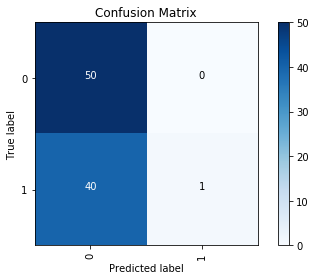

In [24]:
report_performance(y_test, svm_preds)

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] 

**Accuracy** simply measures the percent of correct predictions over all the predictions.

Formula: (TP + TN) / (TP + TN + FP + FN )

This metric gives us a overview of the model performance but we couldn't tell the performance of each class based on this metric

**Precision** measures the percentage of true positive predictions over all positive prediction which indicates the relevance of the prediction result

Formula: TP / (TP + FP )

In this case when the model predicts everything as positive, precision is a much better metrics over recall, because in such case recall will get a score of 1. 

**Recall** measures the percentage of true positive prediction over all positive groud-truth. A high recall means the model must predict relevant feature correctly with high probablity.

Formula: TP / (TP + FN )

**f1 score** is the weighted average of precision and recall which combines both false positve and false negative. 

In the case of recommendation system, precision is a better metric over recall because FP means makeing recommendation when customer is not interested, FN means fail to recommand when customer is interested. Customer who's interest will serach the product regardless but recommanding irrelevant products too often might drive them away from the platform. 

In the case of cancer detection, recall is much more important than precision because the cost of a false negative (tell patients they don't have cancer when they indeed have) is catastrophic.

Accuracy is better when the cost of false negative and false positive have similar effects and true positve and true negative have more important effect on false negative and false positve. F1 score gives us a overview of both recall and precesion.
 


References:
https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

In [25]:
def draw_roc_curve(svm_clf, X_test, y_test):
    svm_prob = svm_clf.predict_proba(X_test)
    prob_preds = svm_prob[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test.values, prob_preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" %(roc_auc))
    plt.plot([0, 1], [0, 1])
    plt.xlabel('False Positve Rate')
    plt.ylabel('True positive Rate')
    plt.title("ROC curve")
    plt.legend(loc="lower right")
    plt.show()

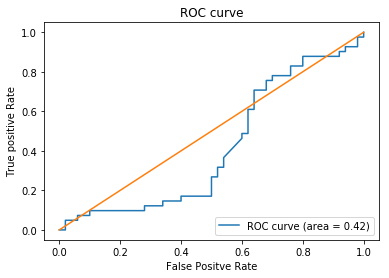

In [26]:
draw_roc_curve(svm_clf, X_test, y_test)

[Describe what an ROC Curve is and what the results mean here] 

The X-axis is the False Positve Rate: FP / (FP + TN )
The Y-axis is the True Positive Rate: TP / (TP + FN )

The ROC curve measures the perforamce for binary classification at various threshold which tells how much the model is caplable of distinguishing two classes.
Ideally, we want our curve to be as close to the left as possible.

We can tell from the above plot, our model does poorly of separting the two classes. AUC of 0.58 indicates the model can barly distuinguish the two classes.

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [27]:
svm_clf.fit(train_processed, y_train)
svm_preds = svm_clf.predict(test_processed)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

acc:0.846
precision:0.846
recall:0.805
f1:0.825


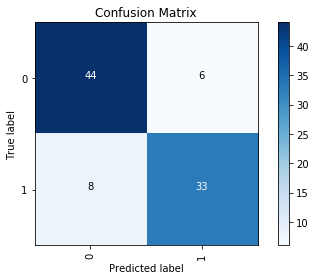

In [28]:
report_performance(y_test, svm_preds)

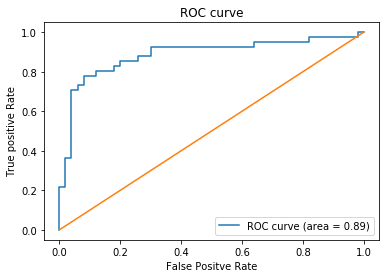

In [29]:
draw_roc_curve(svm_clf, test_processed, y_test)


### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

In [30]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
heart_df.corrwith(labels.to_frame('sick')['sick'])

age         0.225439
sex         0.280937
cp         -0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
thalach    -0.421741
exang       0.436757
oldpeak     0.430696
slope      -0.345877
ca          0.391724
thal        0.344029
dtype: float64

[Provide explanation here]

Using the raw dataset, the model has no capability of distinguishing two classes and predicts most instances as negative (not having heart attack), one the other hand, the model trained on preprocessed data does a much better job.

The reason being before normalization, the scale of positive correlated variable (including age, sex, exang, oldpeak, ca, thal ) are too small comparing with variables trestbps, chol and thalch, thus the effect of those small scale variables diminish during prediction. 

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [32]:
# SVM

svm_clf = SVC(kernel='linear', gamma='auto',probability=True)
svm_clf.fit(train_processed, y_train)
svm_preds = svm_clf.predict(test_processed)



acc:0.813
precision:0.800
recall:0.780
f1:0.790


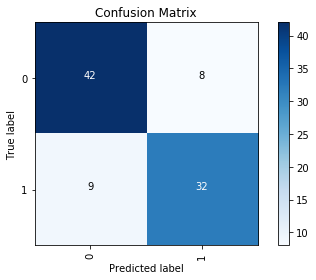

In [33]:
report_performance(y_test, svm_preds)

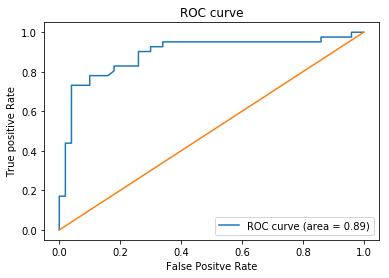

In [34]:
draw_roc_curve(svm_clf, test_processed, y_test)


### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Provide explanation here]

The overall performance seemed dropped a little bit. The model is still capable of distinguishing and predicting two classes accurately most of the time 

By changing from the default rbf kernel to a linear kenel, the performance slightly decrease, which might be an indication of the data is linearly separable, since rbf kernel can map data into higher dimension.

The TSNE map below suggest that the data might not be easily linearly separated.


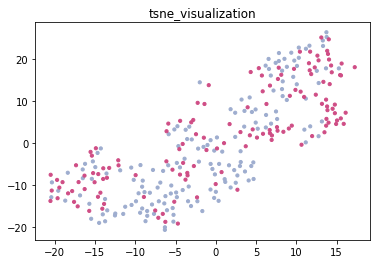

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
colors = [(0.62,0.68,0.81) if x == 0 else (0.81,0.3,0.52) for x in labels ]
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(heart_df.values)
k = np.array(transformed_data)
plt.scatter(k[:, 0], k[:, 1], c=colors, zorder=10, s=10)
plt.title("tsne_visualization")
plt.show()

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [36]:
def report_performance(y_test, svm_preds):
    print("acc:%0.3f"%metrics.accuracy_score(y_test.values, svm_preds))
    print("precision:%0.3f"%metrics.precision_score(y_test.values, svm_preds))
    print("recall:%0.3f"%metrics.recall_score(y_test.values, svm_preds))
    print("f1:%0.3f"%metrics.f1_score(y_test.values, svm_preds))

    draw_confusion_matrix(y=y_test.values, yhat=svm_preds, classes=[0, 1])
    


acc:0.846
precision:0.829
recall:0.829
f1:0.829


/Users/danni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


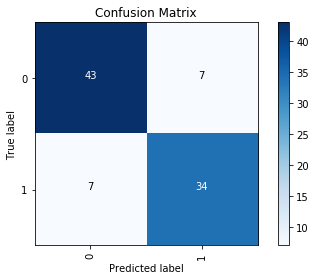

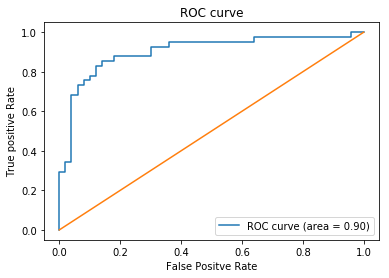

In [37]:
# Logistic Regression


logistic_clf = LogisticRegression(random_state=0,
                                 solver='sag',
                                  max_iter=10)
logistic_clf.fit(train_processed, y_train)
logistic_preds = logistic_clf.predict(test_processed)

report_performance(y_test, logistic_preds)
draw_roc_curve(logistic_clf, test_processed, y_test)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

acc:0.846
precision:0.846
recall:0.805
f1:0.825


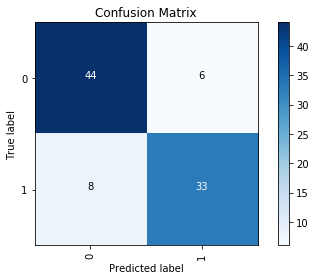

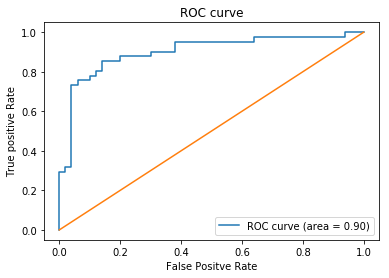

In [38]:
# Logistic Regression


logistic_clf = LogisticRegression(solver='sag',
                                  max_iter=5000)
logistic_clf.fit(train_processed, y_train)
logistic_preds = logistic_clf.predict(test_processed)

report_performance(y_test, logistic_preds)
draw_roc_curve(logistic_clf, test_processed, y_test)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

[Provide explanation here] 

I changed the max_iter from 10 to 5000, the reason the warning occur was due to 10 iteration was not enough for the model to converge (tolerance level reach to the default 1e-4, we could modify the tolerance level as well to accomodate 10 iteration) but that might not be ideal unless the goal is to not overfit.

The outcome didn't improve but stayed the same, this might due to early stoping might be a better regularization method in this case.


### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

acc:0.813
precision:0.800
recall:0.780
f1:0.790


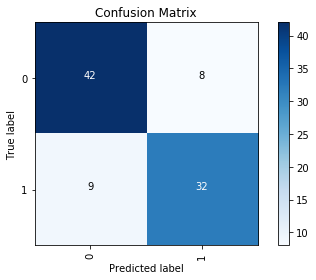

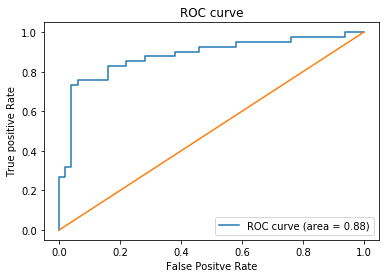

In [39]:
# Logistic Regression


logistic_clf = LogisticRegression(penalty='none',
                                    solver='sag',
                                  max_iter=5000)
logistic_clf.fit(train_processed, y_train)
logistic_preds = logistic_clf.predict(test_processed)

report_performance(y_test, logistic_preds)
draw_roc_curve(logistic_clf, test_processed, y_test)

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

[Provide explanation here] 

Regularization is a way to avoid (hopefully) model overfitting the training data.

The panalty parameter is used to "specify the norm used in the penalization. If ‘none’ (not supported by the liblinear solver), no regularization is applied."

we used sag solver which stands for stochastic average gradident descent that uses random sample for fast big datasets. 
The reason this combo might be optimal is because sag already uses random sample which is a form of regularization, thus we might not need to add extra regularization, and by putting none in the penalty, we supressed the regularization.

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] 

The major distinction between SVM and logistic regression is:

SVM finds a decision boundry such that the margin (distance between the closest point to the boundary) is maxmized.

Logistic Regression: although logistic regression uses linear decision boundary to classify points, it's a generalized linear model, it uses probabilistic model to predict the likelyhood of each class



### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

acc:0.846
precision:0.846
recall:0.805
f1:0.825


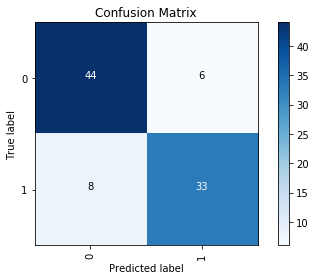

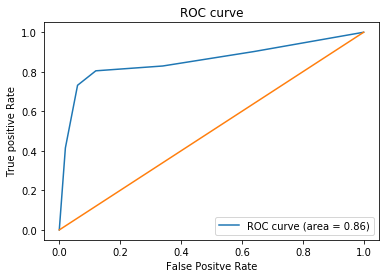

In [40]:
# k-Nearest Neighbors algorithm

neigh_clf = KNeighborsClassifier(n_neighbors=5)
neigh_clf.fit(train_processed, y_train)

neigh_preds = neigh_clf.predict(test_processed)

report_performance(y_test, neigh_preds)
draw_roc_curve(neigh_clf, test_processed, y_test)

### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [48]:
def report_clustering_accuracy(labels_true, labels_pred):
    print("acc:%0.3f"%
          metrics.accuracy_score(labels_true, labels_pred))
    print("Homogeneity Score: %0.3f"%
          (metrics.homogeneity_score(labels_true, labels_pred)))
    print("Completeness Score: %0.3f"%
          (metrics.completeness_score(labels_true, labels_pred)))
    print("V-Measure: %0.3f"
          %(metrics.v_measure_score(labels_true, labels_pred)))
    print("Adjusted Rand Score: %0.3f"%
          (metrics.adjusted_rand_score(labels_true, labels_pred)))
    print("Adjusted Mutual Information: %0.3f"%
          (metrics.adjusted_mutual_info_score(labels_true, labels_pred)))


In [47]:
report_clustering_accuracy(y_test, neigh_preds)

acc:0.846
Homogeneity Score: 0.390
Completeness Score: 0.410
V-Measure: 0.399
Adjusted Rand Score: 0.474
Adjusted Mutual Information: 0.394


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 


[Input answer here] 
The following explaination enclosed in quotes are from sklearn documentation 

Homogeneity Score: " a clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

Thus the homogeneity Score: 0.365 indicates there are quite a few clusters contain points from multiple classes.

Completeness Score: "A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster."

Thus the completeness score: 0.388 indicates there are quite a few data points from the same class are mapped to different clusters.

V-Measure is a hormonic mean of homogeneity_score and completeness score (similar to F-1 score ), in our function, we used the default setting of beta = 1 which weighs both homogeneity score and completeness score equally.

Overall combining the homogeneity score and completeness score, our model got a v-measure of 0.376


The above three measures have the problem of not considering random labeling, meaning when cluster numbers are large, random labeling won't yiled to the above scores to be 0.

Adjusted Rand Score:"Rand index adjusted for chance, measures the similarity between two data clusterings.", we got a score of 0.443 indicates it's unlikely our model is labling by chance.


Adjusted Multual Information: an adjustment of the mutual information score to account for chance. It accounts for the fact that the mutual information is generally higher for two clusterings with a large number of clusters.

Note that the mutual information is a function measures the agreement of the two assignments, in other words, it measures the amount of information obtained about one random variable through observing the other random variable. 
( from wikipedia https://en.wikipedia.org/wiki/Mutual_information ) 



References:
https://en.wikipedia.org/wiki/Rand_index
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise
https://esigma6.wordpress.com/2018/11/03/2-3-9-3-homogeneity-completeness-and-v-measure/

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [43]:
for n in [1,2,3,5,10,20,50,100]:
    print("n="+str(n))
    neigh_clf = KNeighborsClassifier(n_neighbors=n)
    neigh_clf.fit(train_processed, y_train)

    neigh_preds = neigh_clf.predict(test_processed)

    report_clustering_accuracy(y_test, neigh_preds)
    print()

n=1
acc:0.769
Homogeneity Score: 0.222
Completeness Score: 0.220
V-Measure: 0.221
Adjusted Rand Score: 0.282
Adjusted Mutual Information: 0.215

n=2
acc:0.802
Homogeneity Score: 0.312
Completeness Score: 0.353
V-Measure: 0.331
Adjusted Rand Score: 0.358
Adjusted Mutual Information: 0.325

n=3
acc:0.791
Homogeneity Score: 0.263
Completeness Score: 0.261
V-Measure: 0.262
Adjusted Rand Score: 0.332
Adjusted Mutual Information: 0.256

n=5
acc:0.846
Homogeneity Score: 0.376
Completeness Score: 0.379
V-Measure: 0.378
Adjusted Rand Score: 0.474
Adjusted Mutual Information: 0.373

n=10
acc:0.835
Homogeneity Score: 0.350
Completeness Score: 0.354
V-Measure: 0.352
Adjusted Rand Score: 0.443
Adjusted Mutual Information: 0.347

n=20
acc:0.857
Homogeneity Score: 0.408
Completeness Score: 0.419
V-Measure: 0.413
Adjusted Rand Score: 0.505
Adjusted Mutual Information: 0.408

n=50
acc:0.846
Homogeneity Score: 0.378
Completeness Score: 0.385
V-Measure: 0.381
Adjusted Rand Score: 0.474
Adjusted Mutual In

[Describe optimal results here]

## n = 20 gives the best accuracy of 0.857 and best v-measure of 0.413

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

[Input answer here] 
Clustering Algorithm like knn is most effective on small dataset, it makes prediction based on distance of data points, they are more effective than other classification algorithm such as svm/logistic regression when the data is not linear reparable and data points in the same category are close to each other. Although svm can be used on non-linear data with rbf kenel, KNN also has the advantage over svm on multi-class classification, because more than 1 svm classifier needs to be trained to predict more than 2 classes. 

KNN has relatively good accuracy on this dataset, the reason being, in our dataset, patients classified as having heart attack had similar symptoms.

